In [57]:
import pandas as pd
import numpy as np
from scipy.special import logsumexp as lse
import random
from sklearn.cluster import KMeans as km
from scipy.misc import logsumexp

random.seed(660)
np.random.seed(660)

data = pd.read_csv('docword.nips.txt',header=None,sep=' ',skiprows=3,names=['doc','word','count'])
word = pd.read_csv('vocab.nips.txt',header=None,names=['voc'])
table1 = pd.pivot_table(data,values='count',index=['doc'],columns=['word'])

dif=list(set(list(table1.columns)).symmetric_difference(set(range(1,12420))))

dif1 = [i-1 for i in dif]
word1 = word.drop(word.index[dif1])

table1 = table1.fillna(0)
table1.columns=word1['voc']

df = pd.DataFrame(table1.to_records())
df = df.drop('doc',axis=1)

X=df.copy()

num_c=30
pi = 30*[1/num_c]

init=df.ix[np.random.choice(df.index, 30,replace=False)]
p1 = init.divide(init.sum(1),axis=0)

p2=p1

prob = 1e-4
thres = 1e-10

max_iter = 200

#initial p value
p1_old = np.ones((30,12375))
for k in range(max_iter):
    p1 =p1+prob
    p1=p1.multiply(1/p1.sum(1),axis=0)
    x_matrix = pd.DataFrame(np.matmul(X,np.log(p1).T))
   

    cc = x_matrix.subtract(x_matrix.max(1),axis=0)
    cc = np.exp(cc)
    wi = cc.multiply(pi)
    wij = cc.divide(cc.sum(1),axis=0)
    
    #M step
    ma = pd.DataFrame(np.matmul(X.T,wij))
    mb = ma.divide(ma.sum(0),axis=1)
    p1 = pd.DataFrame(mb.T)
    pi = wij.sum(0)/1500
    
    if ((p1-p1_old)**2).sum().sum()<thres:
        break
    p1_old=p1


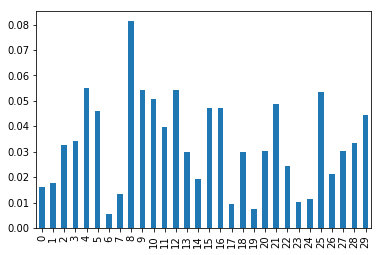

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
pi.plot('bar')

In [60]:
p1.columns = word1['voc'].values
order = np.argsort(-p1.values, axis=1)[:, :10]
result1 = pd.DataFrame(p1.columns[order], 
                      columns=['top{}'.format(i) for i in range(1, 11)],)
result1

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
0,model,direction,cell,head,neuron,network,movement,eye,unit,population
1,signal,model,system,sound,speech,auditory,channel,frequency,output,filter
2,network,learning,algorithm,set,training,neural,problem,input,data,function
3,function,network,neural,weight,input,threshold,bound,number,result,set
4,network,unit,input,learning,neural,function,object,pattern,system,output
5,function,set,algorithm,learning,data,error,training,vector,problem,examples
6,learning,function,model,data,error,subscriber,network,problem,cost,set
7,network,neural,system,set,input,unit,data,training,model,output
8,neuron,cell,model,input,network,spike,synaptic,firing,pattern,system
9,network,recognition,neural,training,system,input,set,word,learning,character


# Problem 2

In [28]:
from PIL import Image
import numpy as np
import itertools
import pandas as pd
from sklearn.cluster import KMeans as km
import matplotlib.pyplot as plt
%matplotlib inline
import random
def em(seed_num=1,num_c=10,pic_name='sunset.jpg'):
    np.random.seed(seed_num)
    random.seed(seed_num)
    iteration=20
    thres =0.01



    image1 = Image.open(pic_name)
    r,g,b=np.array(image1).T
    ht,wd,dh=np.array(image1).shape

    r_list = r.tolist()
    g_list = g.tolist()
    b_list = b.tolist()


    list_r = list(itertools.chain(*r_list))
    list_g = list(itertools.chain(*g_list))
    list_b = list(itertools.chain(*b_list))


    data_array = np.array([list_r,list_g,list_b]).T
    data = pd.DataFrame(data_array)

#     kmeans = km(num_c,random_state=seed_num).fit(data)

#     data['ylabels'] = kmeans.labels_

#     X = data.drop('ylabels',axis=1)

    X = data.copy()
#     # init pi
#     pi=[]
#     for i in range(num_c):
#         pt = data[data['ylabels']==i]
#         pi.append(pt.shape[0])
#     pi = [i/data.shape[0] for i in pi]
#     # init pi
#     centers = kmeans.cluster_centers_
    pi=num_c*[1/num_c]
    centers=np.array(data.ix[np.random.choice(data.index, 30,replace=False)])
    #EM
    q_old=0
    for j in range(iteration):   
        dis=[]
        for i in range(num_c):
            frame1 = np.subtract(X,centers[i])
            ssd = (frame1**2).sum(1)
            dis.append(ssd)

        #dis_mat = pd.DataFrame(np.reshape(dis,(X.shape[0],num_c)))
        dis_mat = pd.DataFrame(np.reshape(dis,(num_c,X.shape[0]))).T

        mat = dis_mat.subtract(dis_mat.min(1),axis=0)
    #    mat = dis_mat
        exp_mat = np.exp((-1/2)*mat)

        wi = np.multiply(exp_mat,pi)
        wij = wi.divide(wi.sum(1),axis=0)

        ma = np.matmul(X.T,wij)
        ma = pd.DataFrame(ma)
        mb = ma/wij.sum(0)
        centers = np.array(mb.T)
        pi = wij.sum(0)/wij.sum().sum()
        pi = pi.tolist()

        q_new=0
        q_new = (np.multiply((np.add(dis_mat,np.log(pi))),wij)).sum().sum()
        if np.abs(q_new-q_old) <thres:
            break
        q_old=q_new

    # Picture show
    label=wij.idxmax(axis=1)
    #label = kmeans.labels_
    X['label'] = label

    dic = {}
    for i in range(num_c):
        dic[i] = list(centers[i])
    dic

    aa = X['label'].map(dic)

    aa = list(aa)
    
    bb=np.array(aa,dtype=np.uint8)
    image2=bb.reshape((wd,ht,dh))
    image2 = np.transpose(image2,(1,0,2))

    plt.imshow(image2)
    plt.show()    

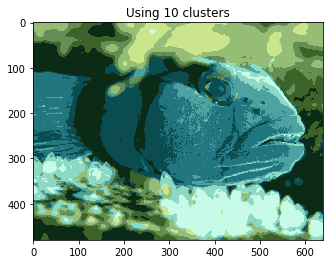

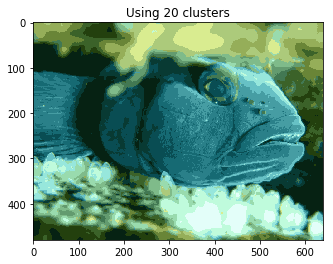

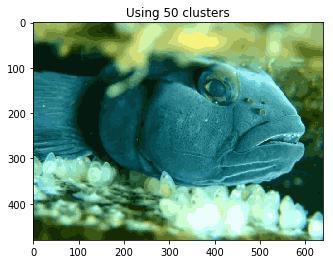

In [275]:
#Fish
c_list=[10,20,50]

for i in c_list:
    plt.figure(figsize=(6,4))
    plt.title('Using '+str(i)+' clusters')
    em(seed_num=1,num_c=i,pic_name='fish.jpg')


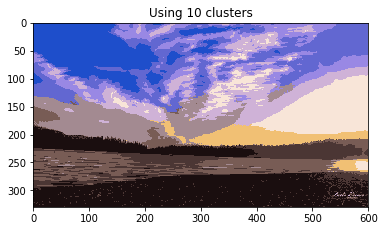

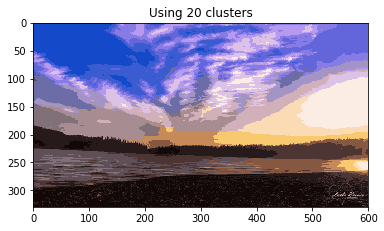

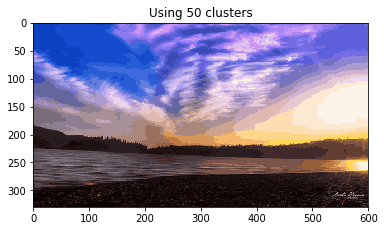

In [276]:
#sunset
c_list=[10,20,50]

for i in c_list:
    plt.figure(figsize=(6,4))
    plt.title('Using '+str(i)+' clusters')
    em(seed_num=1,num_c=i,pic_name='sunset.jpg')

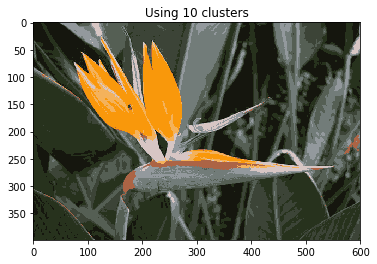

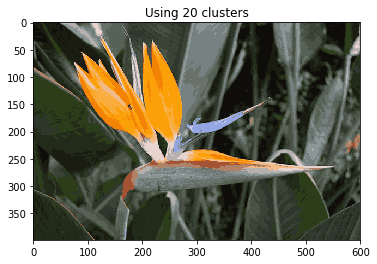

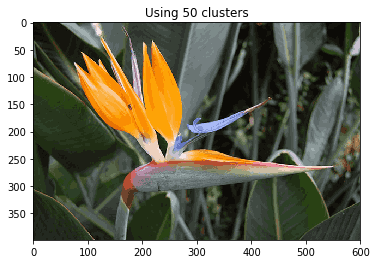

In [277]:
#sunset
c_list=[10,20,50]

for i in c_list:
    plt.figure(figsize=(6,4))
    plt.title('Using '+str(i)+' clusters')
    em(seed_num=1,num_c=i,pic_name='what.jpg')

## Using 5 different seed to run kmeans as 5 different starting point.

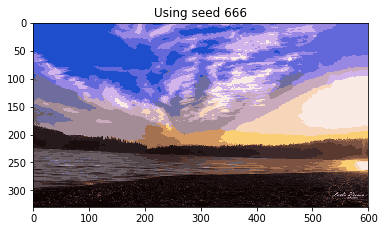

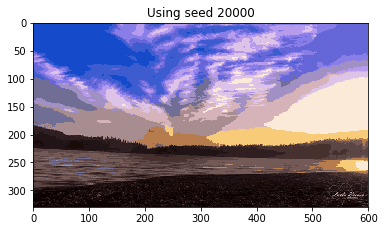

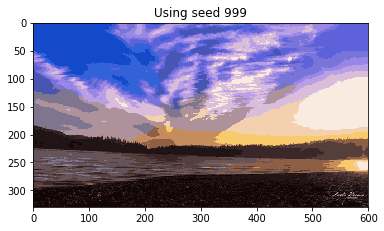

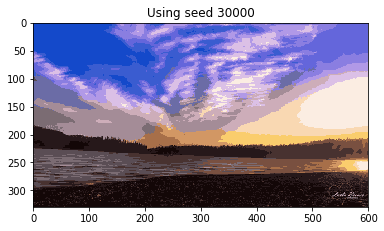

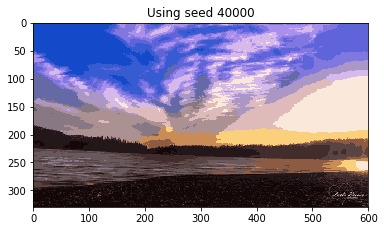

In [29]:
seed_list=list()
for i in seed_list:
    plt.figure(figsize=(6,4))
    plt.title('Using seed '+str(i))
    em(seed_num=i,num_c=20,pic_name='sunset.jpg')

### There is not much variation in the result.However, I see some minor differences in some small areas. like the yellow area on the right. 